In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


In [67]:
df = pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')

In [68]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [69]:
#drop month day and year
df.drop(['month', 'day', 'year'], axis=1, inplace=True)

In [70]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [71]:
df['Classes'].value_counts()


Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [72]:
df["Classes"] = np.where(df['Classes'].str.contains("not fire"),0,1)

In [73]:
df['Classes'].value_counts()


Classes
1    137
0    106
Name: count, dtype: int64

In [74]:
#independet and dependent variables
X = df.drop('FWI', axis=1)
y = df['FWI']

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [76]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [77]:
#Feature selection using Correlation 
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

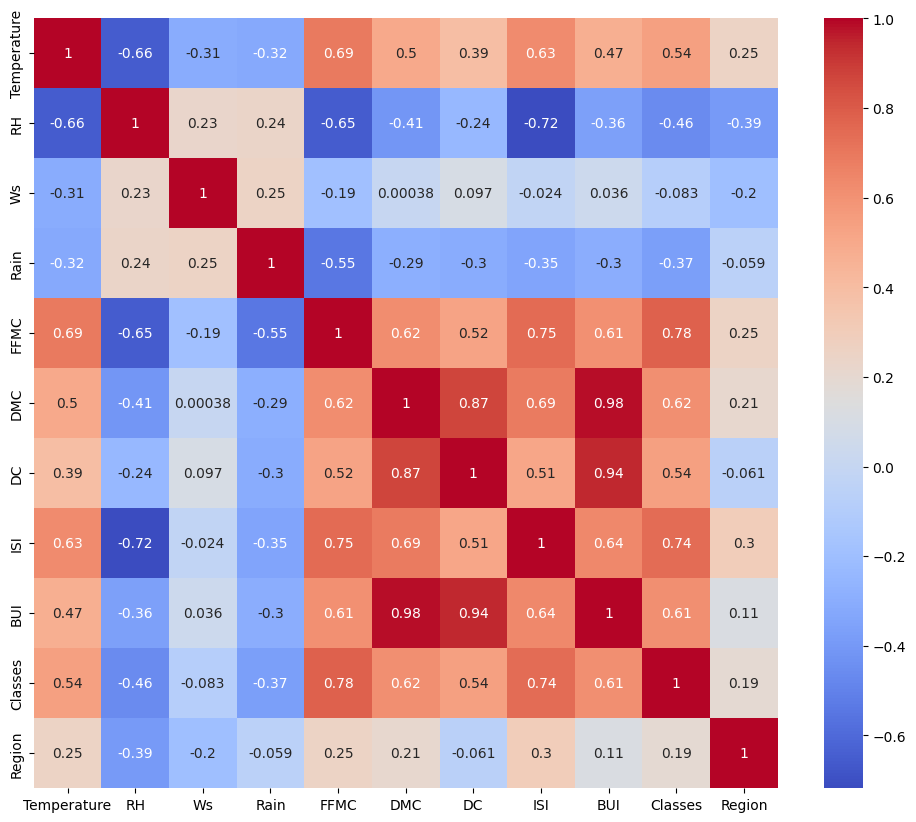

In [78]:
#check for multicollinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [79]:
def correlation (dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [80]:
corr_features = correlation(X_train,0.85)
print(corr_features)

{'BUI', 'DC'}


In [81]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [82]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

## Standardization

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [84]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

Text(0.5, 1.0, 'After Standardization')

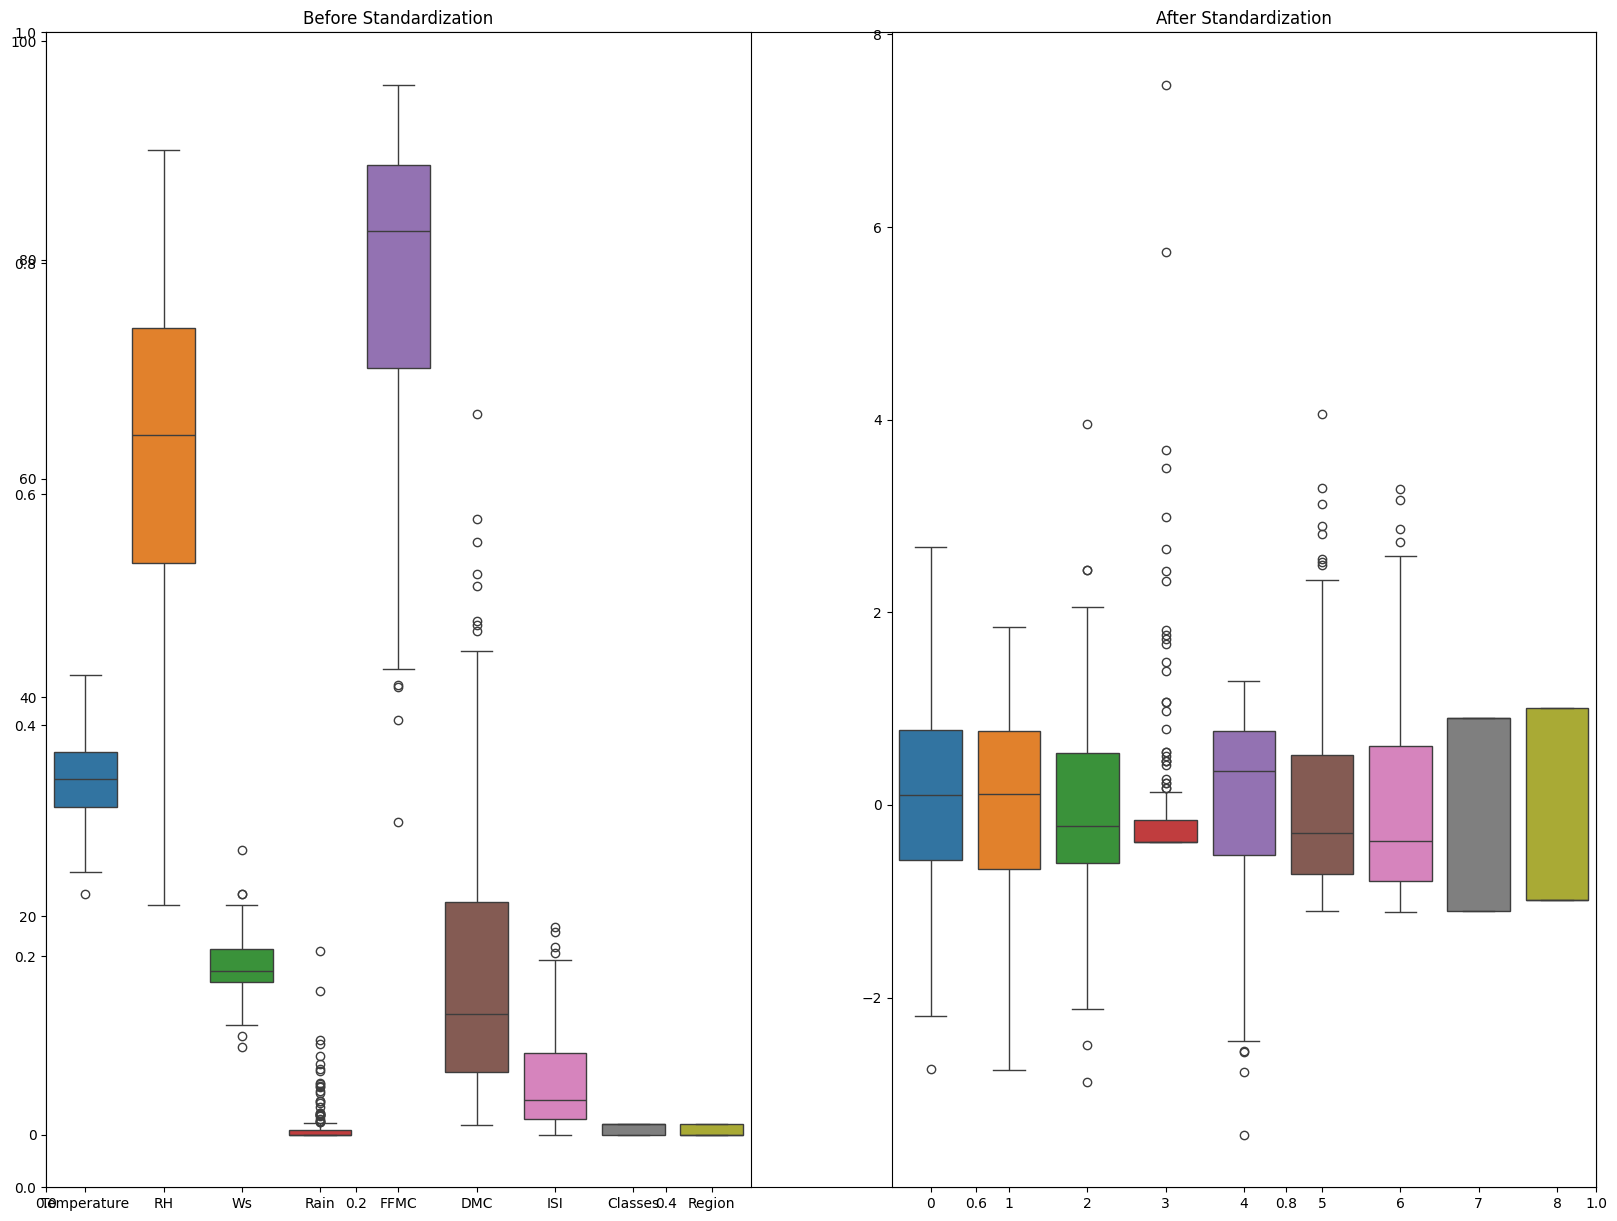

In [86]:
#Box Plots to understand the standardization

plt.subplots(figsize=(20,15))
plt.subplot(1,2,1)
sns.boxplot(data= X_train)
plt.title('Before Standardization')
plt.subplot(1,2,2)
sns.boxplot(data= X_train_scaled)
plt.title('After Standardization')

# Linear Regression Model 

Mean absolute error:  0.6742766873791599
R2 score:  0.9847657384266951


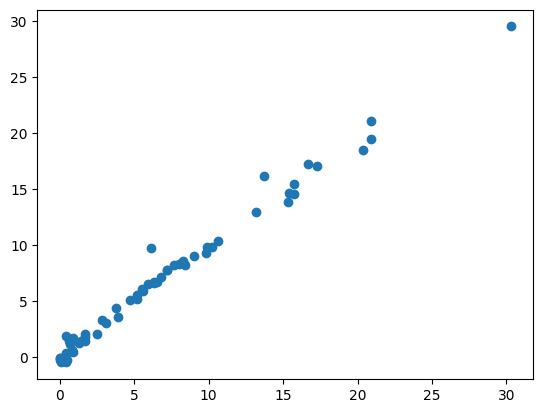

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

regression = LinearRegression()
regression.fit(X_train_scaled, y_train)
y_pred = regression.predict(X_test_scaled)
mae = mean_squared_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)

print("Mean absolute error: ", mae)
print("R2 score: ", r2)

plt.scatter(y_test,y_pred)

Mean absolute error:  2.2483458918974764
R2 score:  0.9492020263112388


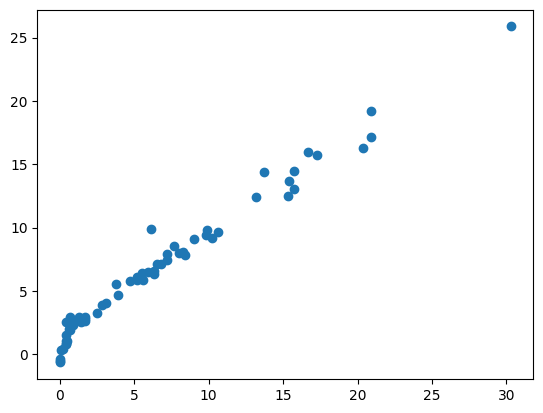

In [88]:
#lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_squared_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)

print("Mean absolute error: ", mae)
print("R2 score: ", r2)

plt.scatter(y_test,y_pred)

Mean absolute error:  0.6949198918152099
R2 score:  0.9842993364555512


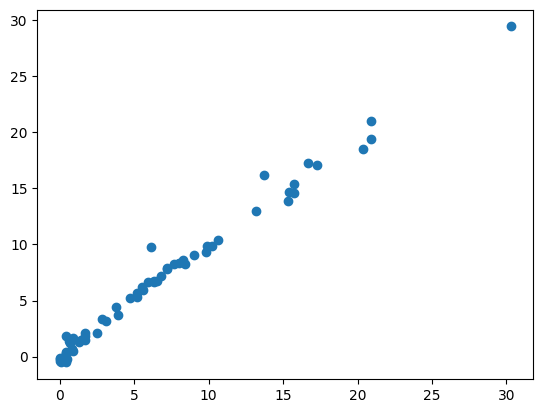

In [89]:
#Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_squared_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)

print("Mean absolute error: ", mae)
print("R2 score: ", r2)

plt.scatter(y_test,y_pred)

Mean absolute error:  5.517251101025224
R2 score:  0.8753460589519703


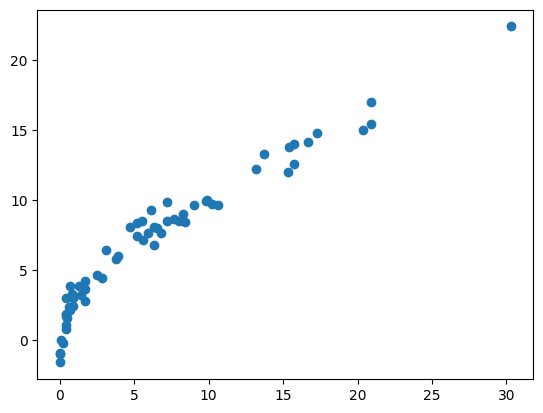

In [90]:
#ElasticNet regression
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)

mae = mean_squared_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)

print("Mean absolute error: ", mae)
print("R2 score: ", r2)

plt.scatter(y_test,y_pred)

In [91]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)

lasso_cv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

Mean absolute error:  0.7924995554743631
R2 score:  0.9820946715928275


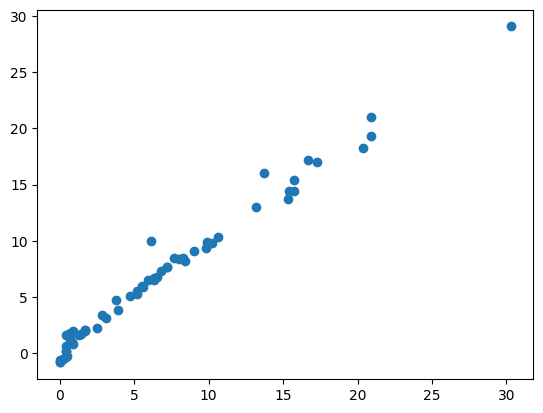

In [92]:
y_pred = lasso_cv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_squared_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)

print("Mean absolute error: ", mae)
print("R2 score: ", r2)

In [93]:
scaler

StandardScaler()

In [94]:
ridge

Ridge()

In [95]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))